In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/datasets/wine.data')

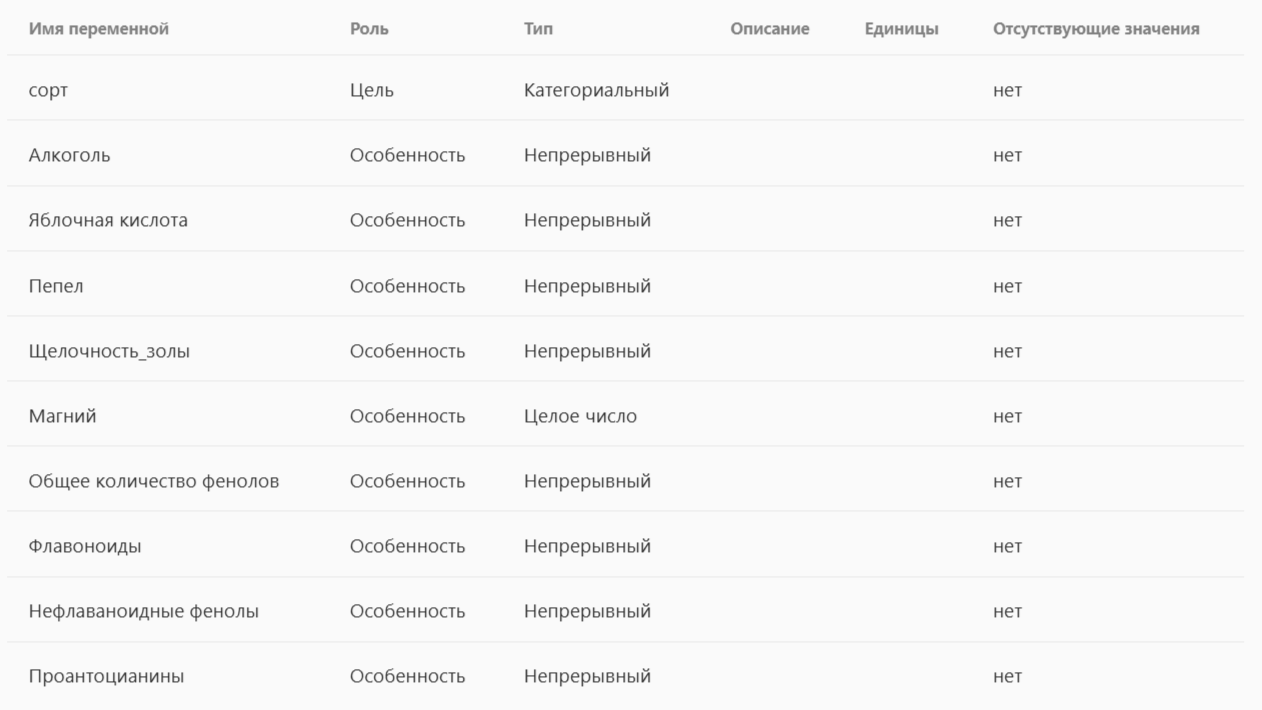

In [4]:
data.head()

,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn import datasets
from sklearn.cluster import KMeans

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malicacid                     178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity_of_ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total_phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid_phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10   Color_intensity              178 non-null    float64
 11  Hue                           178 non-null    float64
 12  0D280_0D315_of_diluted_wines  178 non-null    float64
 13  Proli

In [7]:
data.describe()

,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
data['class'].unique()

array([1, 2, 3])

In [9]:
# Теперь проверим количество строк, которое принадлежит каждому классу:

data['class'].value_counts()

,count
class,
2,71
1,59
3,48


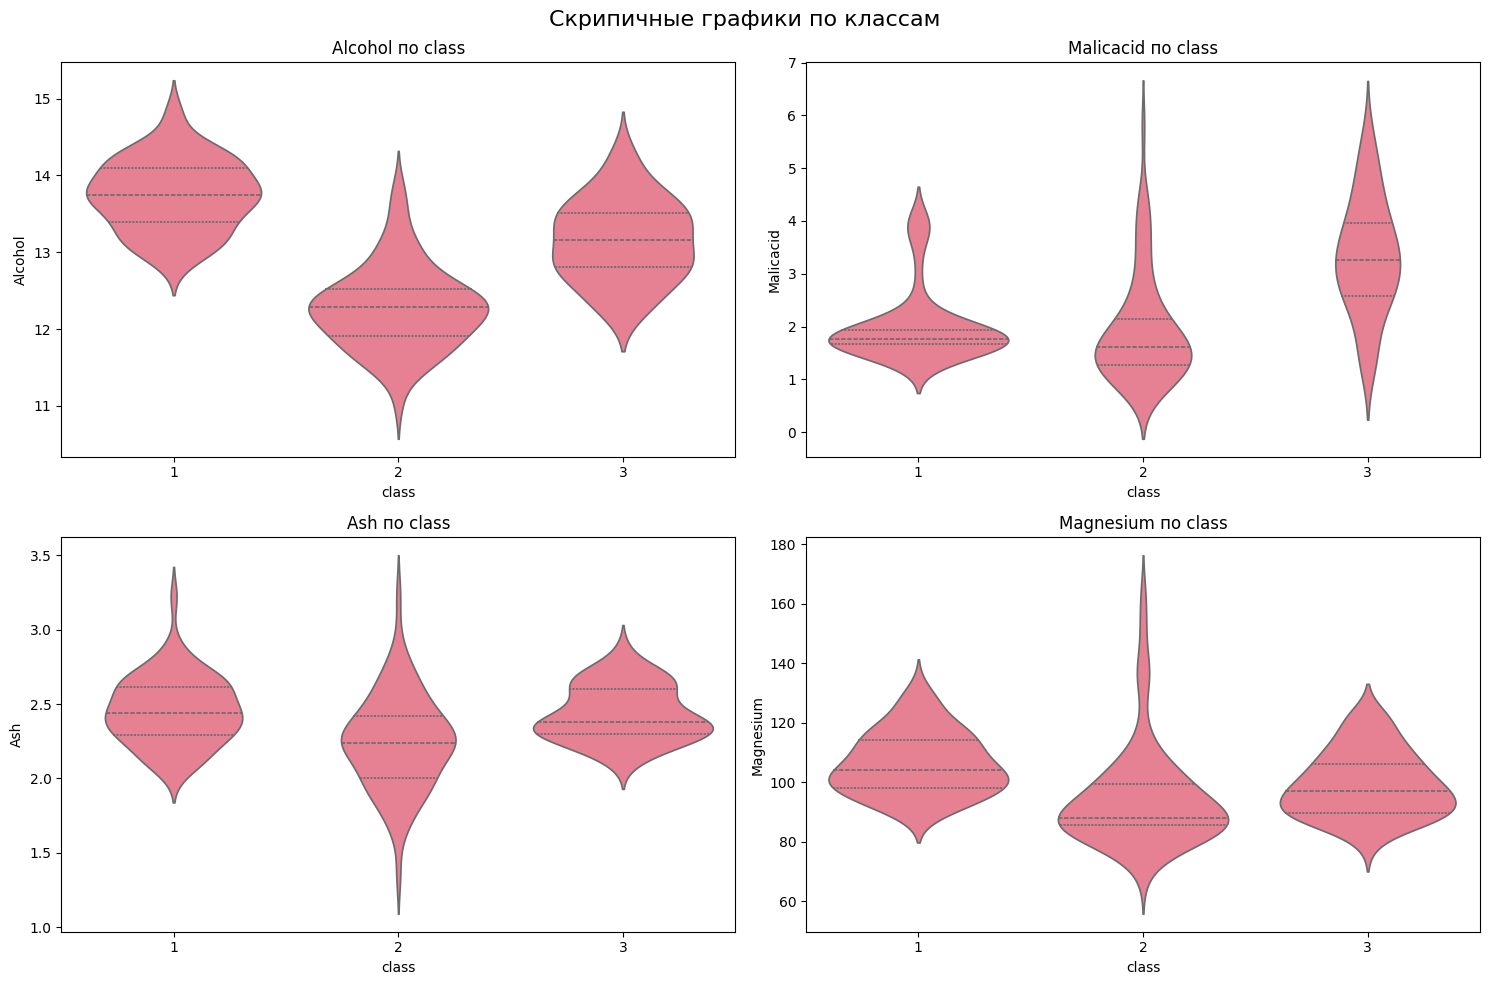

In [10]:
#Скрипичный график для основных признаков по квантилям Rings
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# Выбираем ключевые признаки для анализа
features = ['Alcohol' ,'Malicacid' ,'Ash', 'Magnesium']

for i, feature in enumerate(features):
    sns.violinplot(x='class', y=feature, data=data,
                   ax=axes[i], inner='quartile')
    axes[i].set_title(f'{feature} по class')
    axes[i].set_xlabel('class')
    axes[i].set_ylabel(feature)

plt.suptitle(f'Скрипичные графики по классам', fontsize=16)
plt.tight_layout()
plt.show()



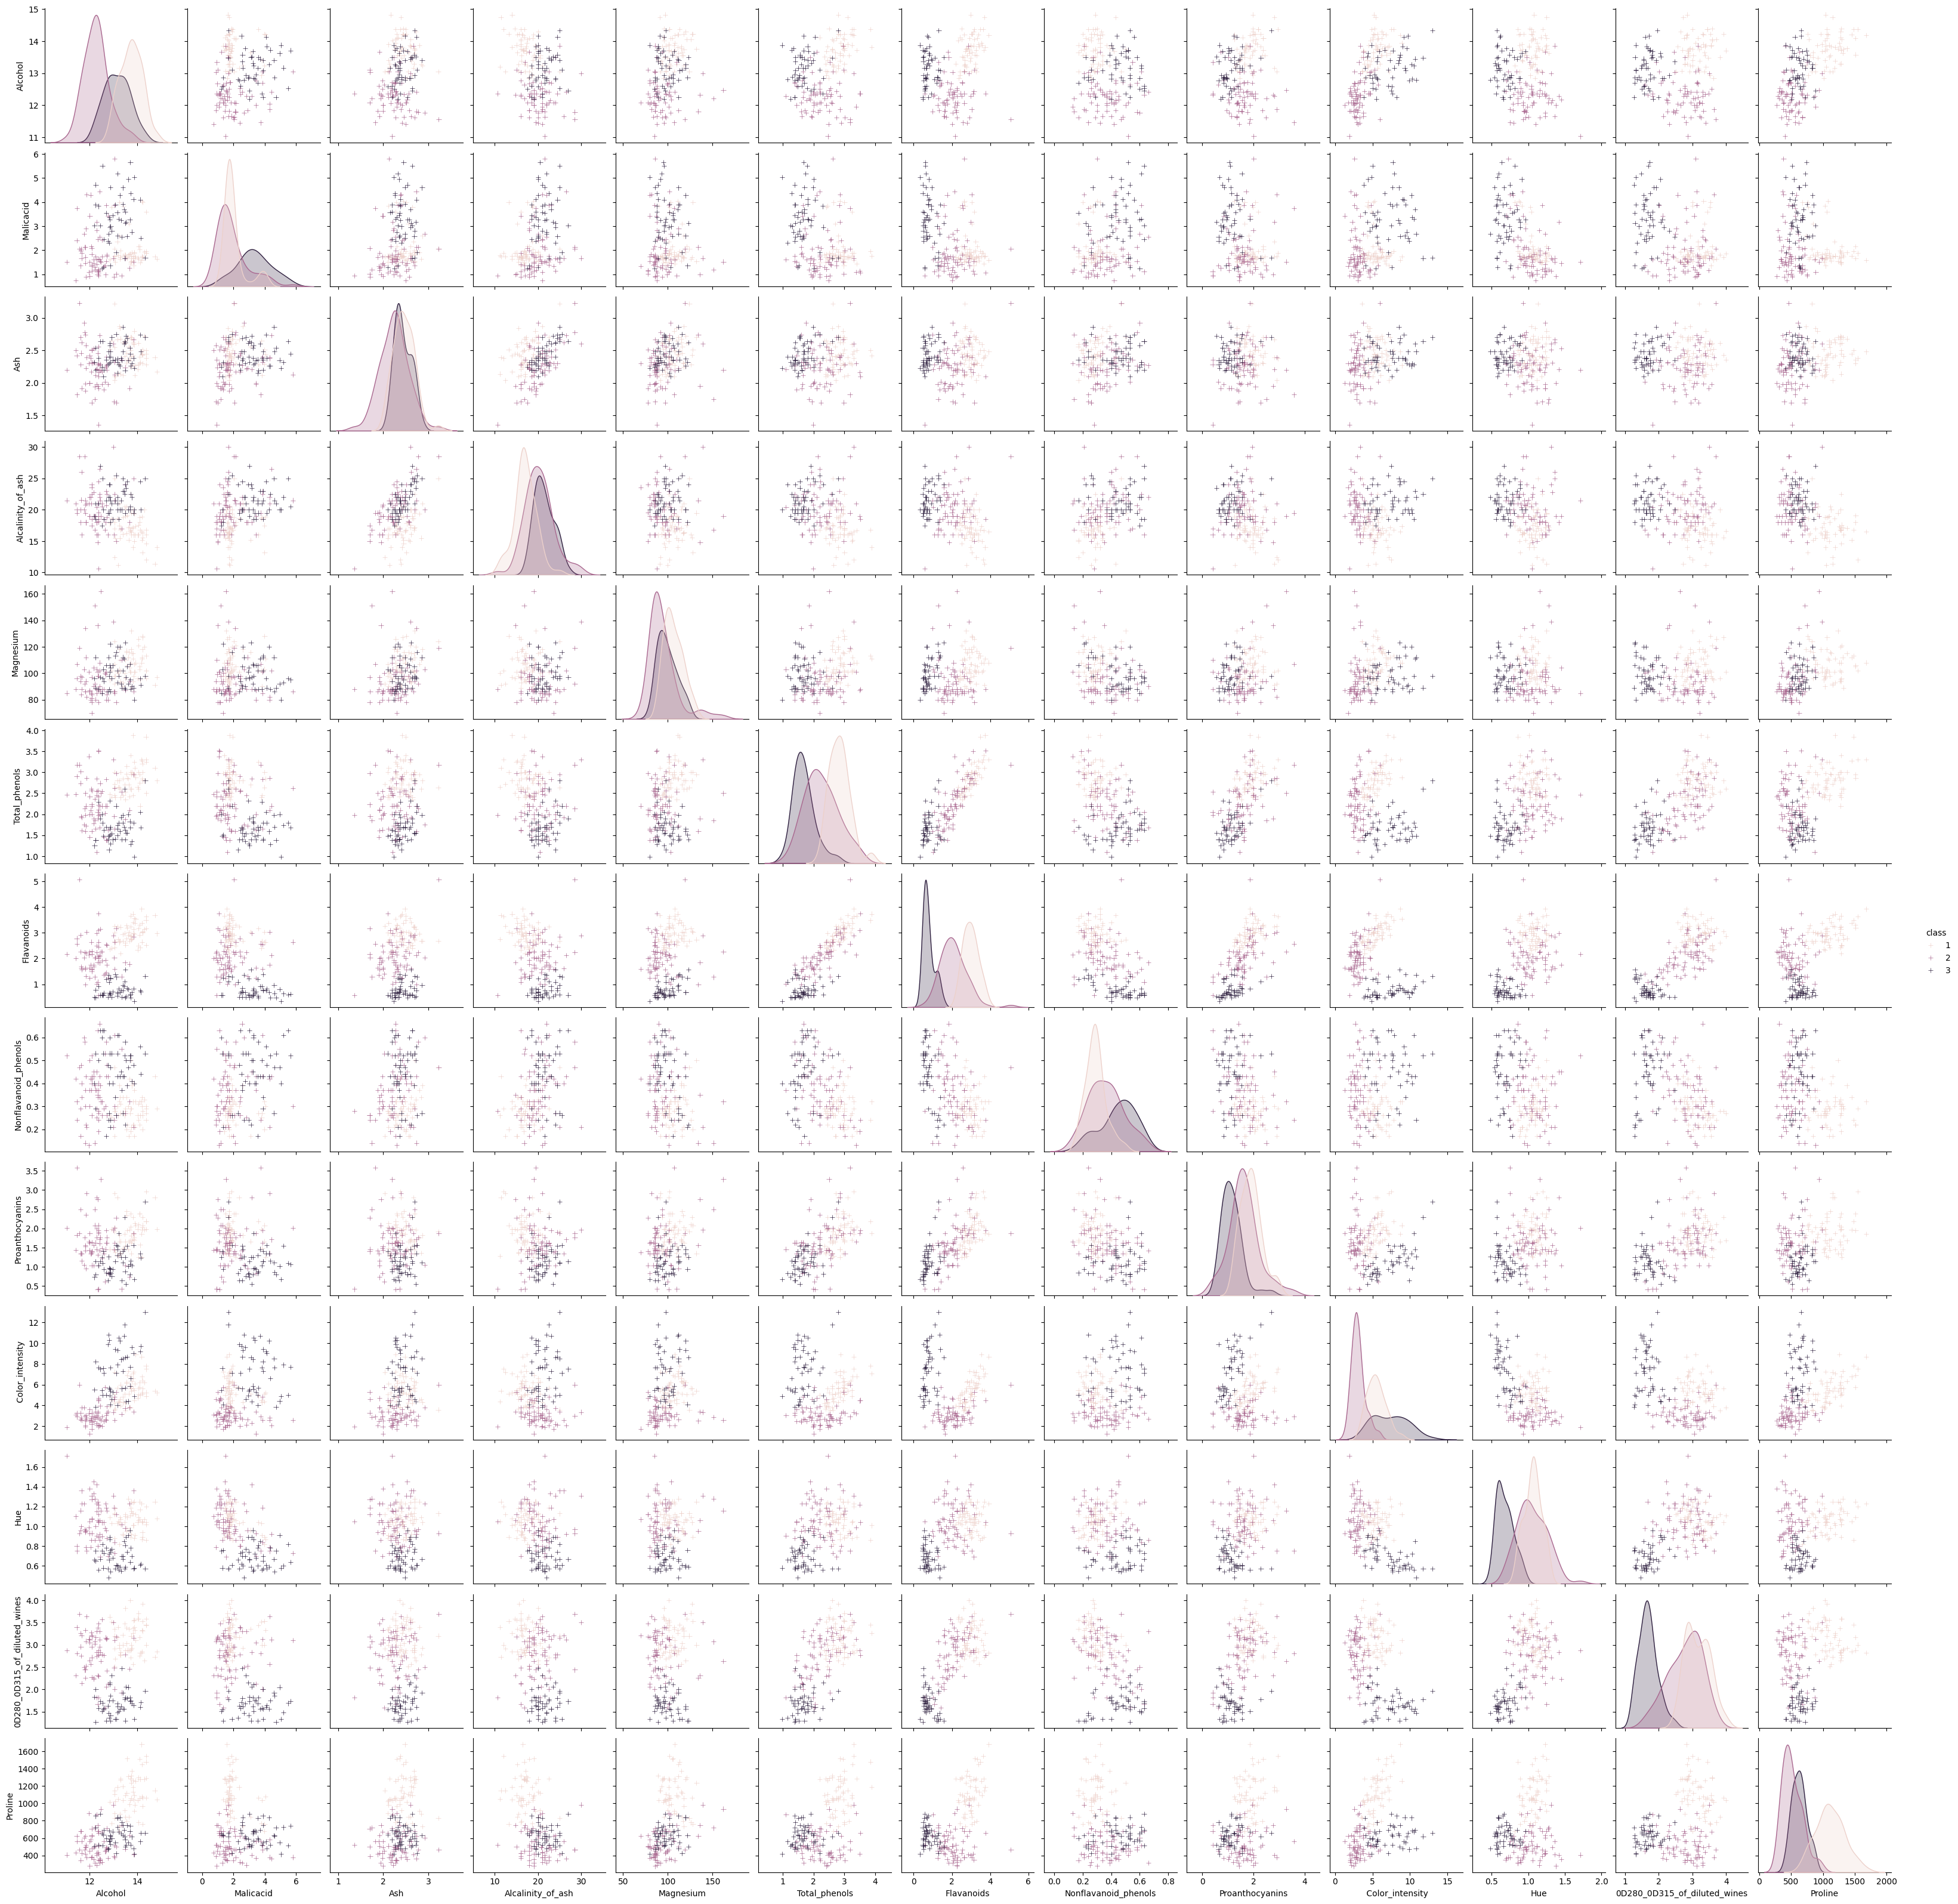

In [ ]:
sns.pairplot(data, hue='class', markers='+')
plt.show()

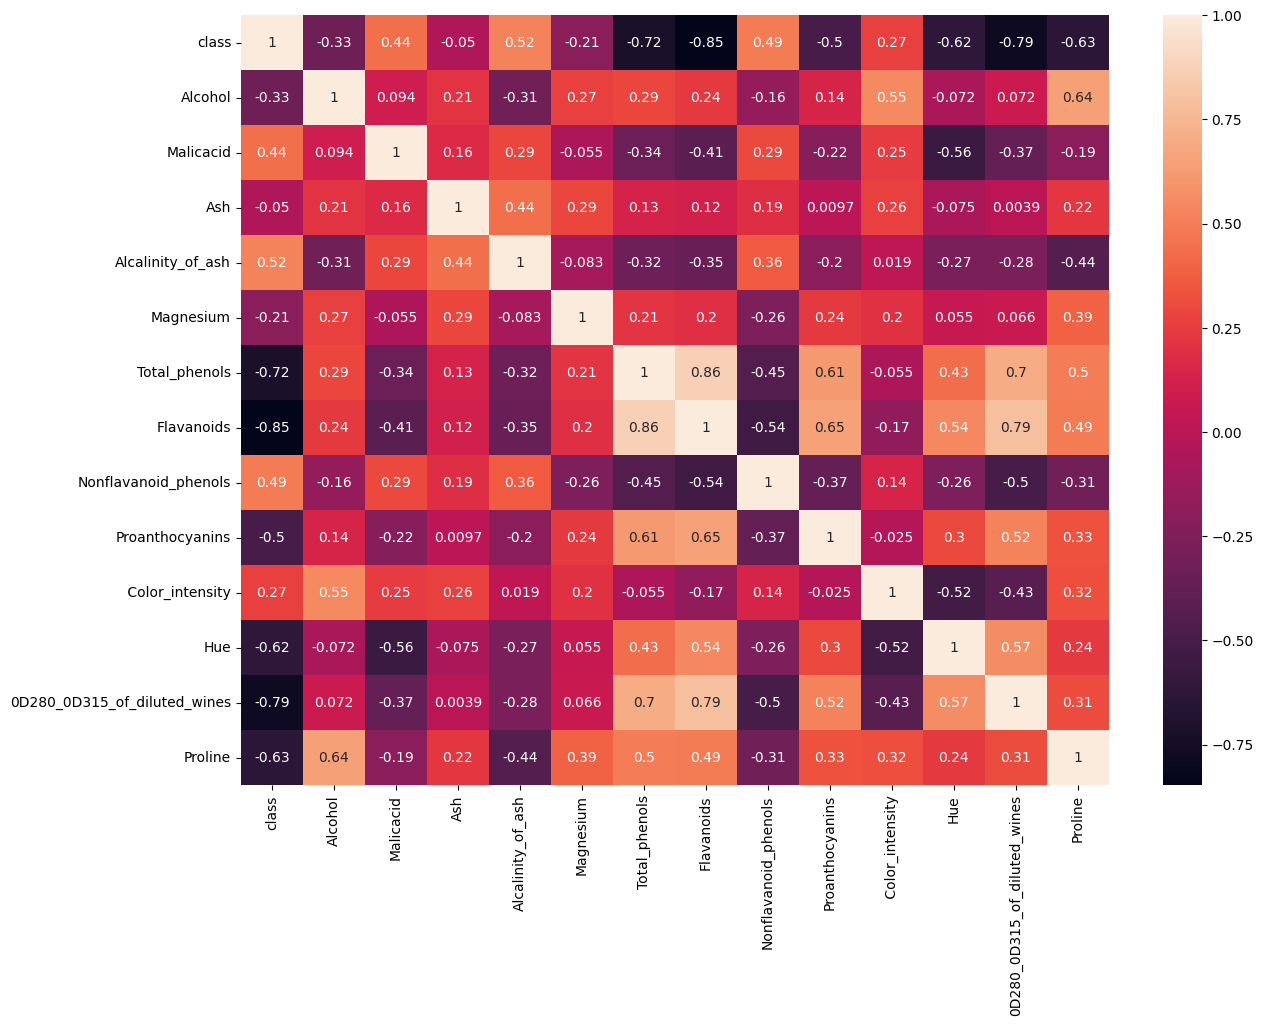

In [11]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(numeric_only = True), annot=True)
plt.show()

In [12]:
X = data.drop(['class'], axis=1)
y = data['class']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (178, 13) | y shape: (178,) 


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [14]:
# Используем прямое преобразование
y_mapped = y.astype(int) - 1  # Преобразуем 1,2,3 в 0,1,2

# Разделяем данные
X_train, X_test, y_train, y_test = train_test_split(
    X, y_mapped,
    test_size=0.30,
    shuffle=True,
    random_state=42,
    stratify=y_mapped
)

print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train распределение: {pd.Series(y_train).value_counts().sort_index()}")
print(f"y_test распределение: {pd.Series(y_test).value_counts().sort_index()}")

X_train: (124, 13), X_test: (54, 13)
y_train распределение: class
0    41
1    50
2    33
Name: count, dtype: int64
y_test распределение: class
0    18
1    21
2    15
Name: count, dtype: int64


In [15]:
# создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=10000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=20, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.958333 (0.072169)
LDA: 0.983333 (0.050000)
KNN: 0.698810 (0.131767)
CART: 0.895238 (0.107381)
NB: 0.951190 (0.091434)
SVC: 0.452381 (0.112435)


In [16]:
sk_lda = LinearDiscriminantAnalysis(solver='eigen')
sk_lda.fit(X_train, y_train)
sk_lda_pred_res = sk_lda.predict(X_test)
sk_transformed = sk_lda.transform(X_train)
sk_lda_accuracy = accuracy_score(y_test, sk_lda_pred_res)

print(f'sk LDA accuracy: {sk_lda_accuracy}')
print(f'sk LDA prediction: {sk_lda_pred_res}')
print('sk transformed features', sk_transformed[:5].T, sep='\n')

sk LDA accuracy: 0.9814814814814815
sk LDA prediction: [0 1 0 0 0 0 2 1 0 2 1 1 2 1 0 2 1 0 2 2 1 2 2 2 1 2 0 1 0 1 0 1 2 1 1 2 1
 1 1 0 2 0 0 0 0 1 1 0 2 0 1 1 2 0]
sk transformed features
[[-10.15222415  -9.76719555  -9.19294781 -10.58756568  -8.01023526]
 [-17.93460342 -16.72736977 -17.66965178 -17.86133429 -13.26729035]]


<Axes: title={'center': 'LDA surface with original features'}>

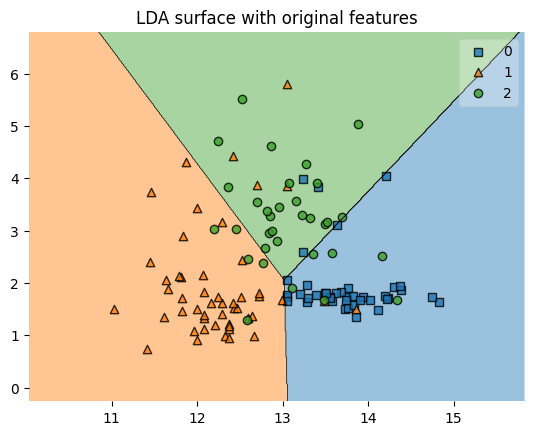

In [17]:
from mlxtend.plotting import plot_decision_regions
y_s = y_train
X_2d= X_train[['Alcohol' ,'Malicacid']].values

y_2d = y_s.values


sk_lda1 = LinearDiscriminantAnalysis(solver='eigen')
sk_lda1.fit(X_2d, y_2d)

plt.title('LDA surface with original features')
plot_decision_regions(
    	X=X_2d,
    	y=y_2d,
    	clf=sk_lda1)

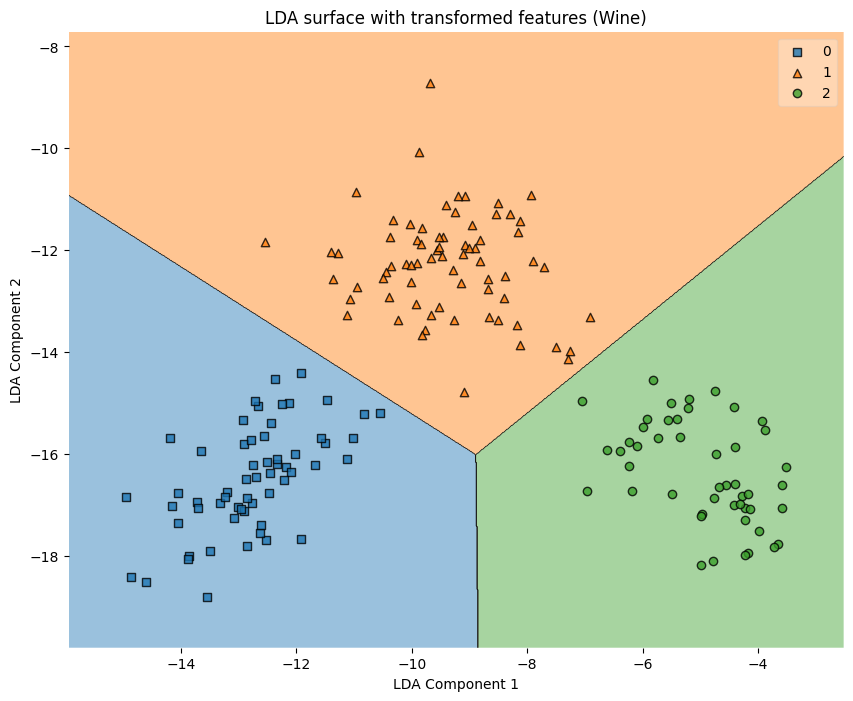

Объясненная дисперсия LDA компонент: [0.66250189 0.33749811]


In [18]:
df = data["class"].map({1: 0, 2: 1, 3: 2})

Xs = data[['Alcohol', 'Malicacid']]
ys = df.values

sk_lda2 = LinearDiscriminantAnalysis(solver='eigen')

X_all = data.drop('class', axis=1)  # Все признаки
X1_lda = sk_lda2.fit(X_all, ys).transform(X_all)

Xs = X1_lda  # Перезаписываем Xs

X1_lda_train, X1_lda_test, y1_train, y1_test = train_test_split(
    X1_lda, ys,
    random_state=0,
    stratify=ys  # Добавил для сохранения пропорций
)

sk_lda2.fit(X1_lda_train, y1_train)

plt.figure(figsize=(10, 8))
plt.title('LDA surface with transformed features (Wine)')
plot_decision_regions(X=X1_lda, y=ys, clf=sk_lda2)
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.show()

print("Объясненная дисперсия LDA компонент:", sk_lda2.explained_variance_ratio_)

In [19]:
predicted = sk_lda2.predict(X1_lda_test)

In [20]:
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

## Accuray e AUC
'''
Теперь смотрим метрики.
НА ТЕСТОВОМ ДАТАСЕТЕ
'''
accuracy = metrics.accuracy_score(y1_test, predicted)#Оценим точность классификации.

'''
Получим результат
'''

## Precision e Recall
recall = metrics.recall_score(y1_test, predicted, average="weighted")
precision = metrics.precision_score(y1_test, predicted, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y1_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

Recall (all 1s predicted right): 1.0
Precision (confidence when predicting a 1): 1.0
Detail:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

